In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [20]:
covid = pd.read_csv('C:\\Users\\Admin\\Desktop\\lyriclious codes\\data science\\covidreports.csv')

In [21]:
covid.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [22]:
covid.shape

(2499, 12)

In [23]:
covid.dtypes

Country                       object
Age                            int64
Gender                        object
fever                          int64
Bodypain                       int64
Runny_nose                     int64
Difficulty_in_breathing        int64
Nasal_congestion               int64
Sore_throat                    int64
Severity                      object
Contact_with_covid_patient    object
Infected                       int64
dtype: object

In [24]:
covid.isnull()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,False,False,False,False,False,False,False,False,False,False,False,False
2495,False,False,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,False,False


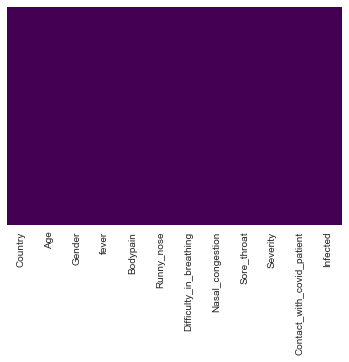

In [25]:
#shows no null values are present
sns.heatmap(covid.isnull(),yticklabels=False,cbar=False,cmap='viridis')

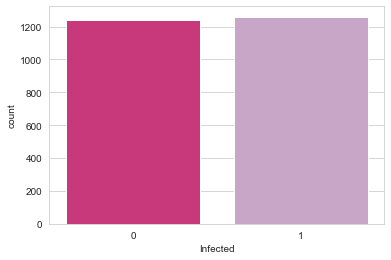

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Infected',data=covid,palette="PuRd_r")

In [27]:
covid['Infected'].value_counts()

1    1260
0    1239
Name: Infected, dtype: int64

In [28]:
covid.isna().any()

Country                       False
Age                           False
Gender                        False
fever                         False
Bodypain                      False
Runny_nose                    False
Difficulty_in_breathing       False
Nasal_congestion              False
Sore_throat                   False
Severity                      False
Contact_with_covid_patient    False
Infected                      False
dtype: bool

In [29]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     2499 non-null   object
 1   Age                         2499 non-null   int64 
 2   Gender                      2499 non-null   object
 3   fever                       2499 non-null   int64 
 4   Bodypain                    2499 non-null   int64 
 5   Runny_nose                  2499 non-null   int64 
 6   Difficulty_in_breathing     2499 non-null   int64 
 7   Nasal_congestion            2499 non-null   int64 
 8   Sore_throat                 2499 non-null   int64 
 9   Severity                    2499 non-null   object
 10  Contact_with_covid_patient  2499 non-null   object
 11  Infected                    2499 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 234.4+ KB


In [30]:
covid.describe()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,43.573429,100.585834,0.652261,0.294518,0.484194,0.470188,0.509804,0.504202
std,17.379751,1.711163,0.476348,0.455917,0.499850,0.499210,0.500004,0.500082
min,10.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,55.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
covid.groupby('Country')['Infected','Nasal_congestion','Sore_throat'].sum()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Infected,Nasal_congestion,Sore_throat
Country,,,
Afghanistan,9,9,9
Albania,9,10,7
Argentina,3,9,12
Armenia,17,10,18
Australia,3,3,11
...,...,...,...
Ukraine,11,7,16
Vietnam,32,37,38
Yemen,4,5,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D85BCBA888>,
      dtype=object)

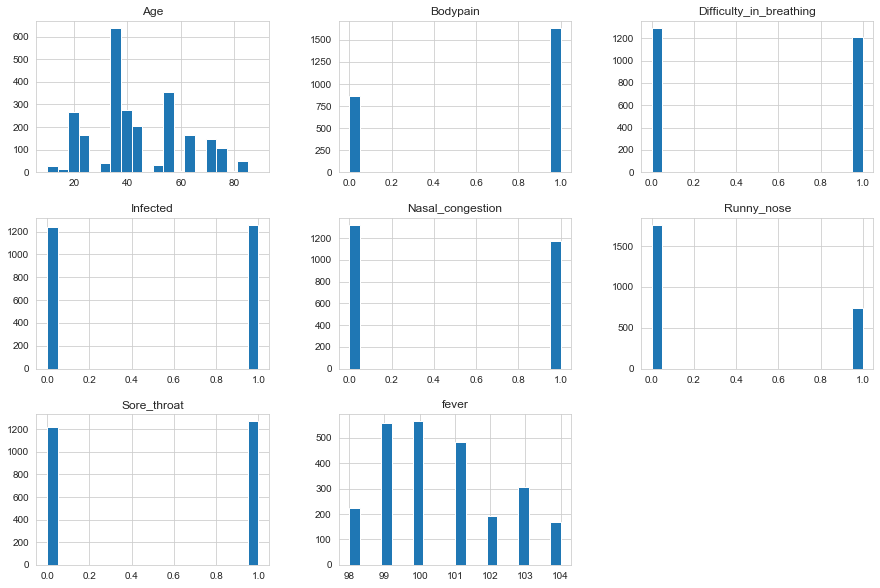

In [32]:
covid.hist(bins= 20, figsize=(15,10))

In [33]:
covid.corr()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
Age,1.000000,0.037226,0.079027,0.138832,0.165208,0.241601,0.027108,0.165147
fever,0.037226,1.000000,0.444512,0.226203,0.502733,0.179320,-0.181238,0.390555
Bodypain,0.079027,0.444512,1.000000,0.027532,0.140832,0.157560,0.179876,0.442229
Runny_nose,0.138832,0.226203,0.027532,1.000000,0.331361,-0.058146,-0.262037,0.284281
Difficulty_in_breathing,0.165208,0.502733,0.140832,0.331361,1.000000,0.020972,-0.296104,0.483518
Nasal_congestion,0.241601,0.179320,0.157560,-0.058146,0.020972,1.000000,0.030441,0.287938
Sore_throat,0.027108,-0.181238,0.179876,-0.262037,-0.296104,0.030441,1.000000,-0.218302
Infected,0.165147,0.390555,0.442229,0.284281,0.483518,0.287938,-0.218302,1.000000


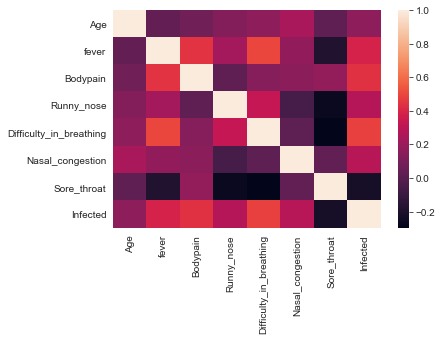

In [34]:
sns.heatmap(covid.corr())

correlation matrix

In [35]:
corr_matrix = covid.corr()
corr_matrix["Infected"].sort_values(ascending=False)

Infected                   1.000000
Difficulty_in_breathing    0.483518
Bodypain                   0.442229
fever                      0.390555
Nasal_congestion           0.287938
Runny_nose                 0.284281
Age                        0.165147
Sore_throat               -0.218302
Name: Infected, dtype: float64

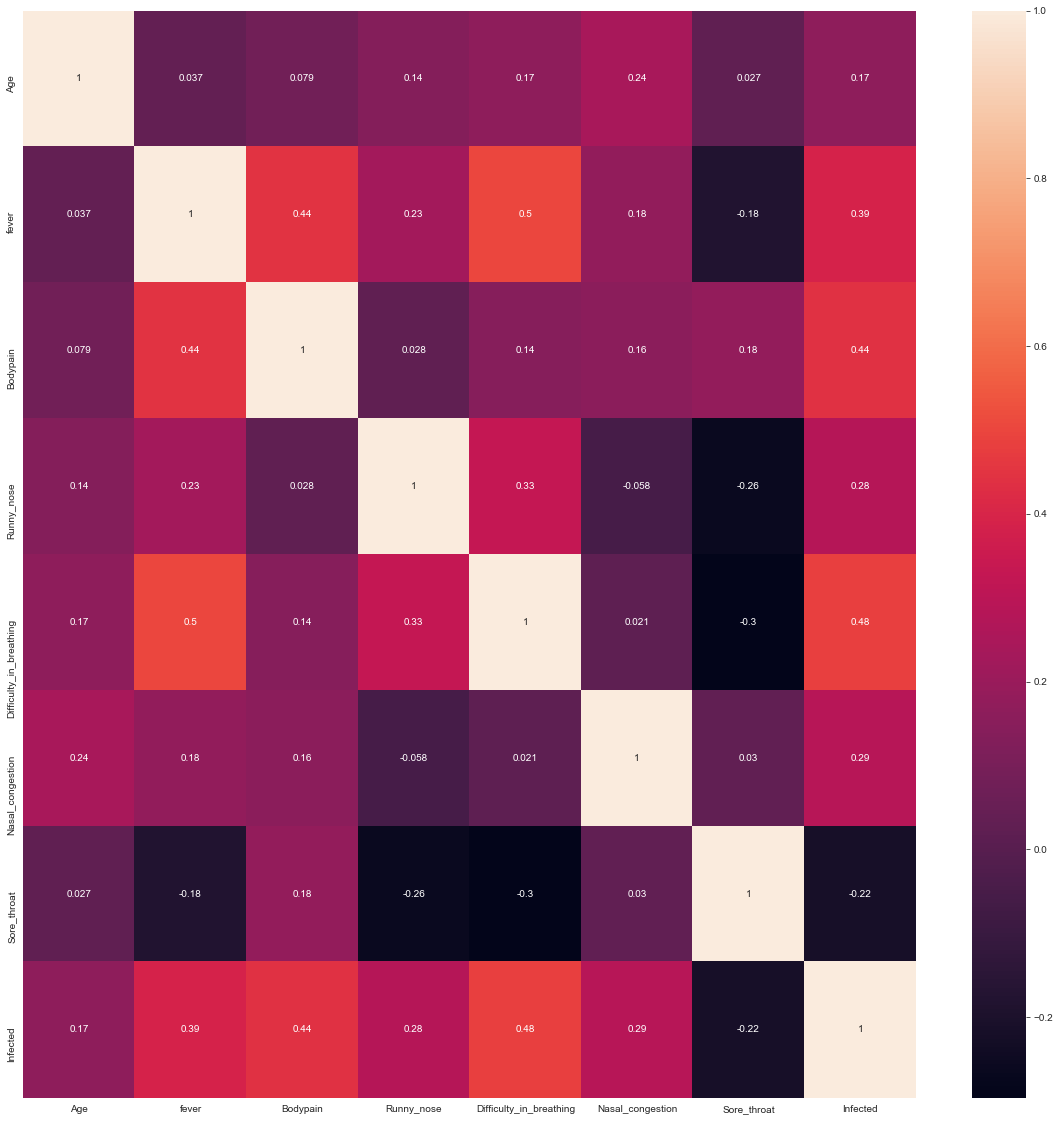

In [36]:
plt.figure(figsize= (20, 20))
sns.heatmap(covid.corr(), annot = True )

**Converting object to int**

In [37]:
Gender = pd.get_dummies(covid['Gender'],drop_first=True)
Severity=pd.get_dummies(covid['Severity'],drop_first=True)
Contact_with_covid_patient=pd.get_dummies(covid['Contact_with_covid_patient'],drop_first=True)

In [38]:
cases=covid[covid["Country"]=="India"]
cases.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
24,India,16,Male,98,0,0,0,0,0,Mild,No,0
123,India,55,Male,101,1,0,0,1,0,Severe,Not known,1
223,India,16,Male,98,0,0,0,0,0,Mild,No,0
346,India,35,Female,101,1,0,0,1,1,Mild,Not known,1
510,India,24,Female,98,0,0,0,0,1,Mild,No,0


In [39]:
cases.describe()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
count,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.00000,20.000000
mean,34.900000,99.650000,0.450000,0.0,0.100000,0.500000,0.35000,0.450000
std,18.859313,1.663066,0.510418,0.0,0.307794,0.512989,0.48936,0.510418
min,16.000000,98.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
25%,16.000000,98.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
50%,29.500000,99.500000,0.000000,0.0,0.000000,0.500000,0.00000,0.000000
75%,55.000000,101.000000,1.000000,0.0,0.000000,1.000000,1.00000,1.000000
max,65.000000,102.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000


In [40]:
cases.shape

(20, 12)

In [41]:
X=cases['Age']
y=cases['Infected']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=30)

In [43]:
X_train.shape

(14,)

In [44]:
y_train.shape

(14,)

In [45]:
X_test.shape

(6,)

In [46]:
y_test.shape

(6,)

# **Building Model** 
# *Random Forest*
### **TRAIN**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
rnd_clf=RandomForestClassifier()
rnd_clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rnd_clf.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_rnd_pred= rnd_clf.predict(np.array(X_test).reshape(-1,1))


In [50]:
y_rnd_pred= rnd_clf.predict(np.array(X_train).reshape(-1,1))

In [51]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y_train, y_rnd_pred))
print("Pricision after CV:", precision_score(y_train, y_rnd_pred))
print("Recall after CV   :", recall_score(y_train, y_rnd_pred))
print("f1_score after CV :", f1_score(y_train, y_rnd_pred))

Accuracy after CV : 1.0
Pricision after CV: 1.0
Recall after CV   : 1.0
f1_score after CV : 1.0


### **TEST**

In [52]:
y_test_rnd_pred= rnd_clf.predict(np.array(X_test).reshape(-1,1))

In [53]:
print("Accuracy after CV :", accuracy_score(y_test, y_test_rnd_pred))
print("Pricision after CV:", precision_score(y_test, y_test_rnd_pred))
print("Recall after CV   :", recall_score(y_test, y_test_rnd_pred))
print("f1_score after CV :", f1_score(y_test, y_test_rnd_pred))

Accuracy after CV : 0.8333333333333334
Pricision after CV: 0.6666666666666666
Recall after CV   : 1.0
f1_score after CV : 0.8


# KNN

### **TRAIN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_clf=KNeighborsClassifier(n_neighbors=3)

In [56]:
knn_clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_knn_pred= knn_clf.predict(np.array(X_train).reshape(-1,1))

In [58]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y_train, y_knn_pred))
print("Pricision after CV:", precision_score(y_train, y_knn_pred))
print("Recall after CV   :", recall_score(y_train, y_knn_pred))
print("f1_score after CV :", f1_score(y_train, y_knn_pred))

Accuracy after CV : 0.8571428571428571
Pricision after CV: 0.8571428571428571
Recall after CV   : 0.8571428571428571
f1_score after CV : 0.8571428571428571



### **TEST**

In [59]:
y_test_knn_pred= knn_clf.predict(np.array(X_test).reshape(-1,1)) 

In [60]:
print("Accuracy after CV :", accuracy_score(y_test, y_test_knn_pred))
print("Pricision after CV:", precision_score(y_test, y_test_knn_pred))
print("Recall after CV   :", recall_score(y_test, y_test_knn_pred))
print("f1_score after CV :", f1_score(y_test, y_test_knn_pred))

Accuracy after CV : 0.8333333333333334
Pricision after CV: 0.6666666666666666
Recall after CV   : 1.0
f1_score after CV : 0.8


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# DECISION TREE
### **TRAIN**

In [62]:
dt_clf=tree.DecisionTreeClassifier()
dt_clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
dt_clf.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_dt_pred= dt_clf.predict(np.array(X_test).reshape(-1,1))


In [66]:
y_dt_pred= dt_clf.predict(np.array(X_train).reshape(-1,1))

In [68]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score

In [69]:

print("Accuracy after CV :", accuracy_score(y_train, y_dt_pred))
print("Pricision after CV:", precision_score(y_train, y_dt_pred))
print("Recall after CV   :", recall_score(y_train, y_dt_pred))
print("f1_score after CV :", f1_score(y_train, y_dt_pred))

Accuracy after CV : 1.0
Pricision after CV: 1.0
Recall after CV   : 1.0
f1_score after CV : 1.0


### **TEST**

In [70]:
y_test_dt_pred= dt_clf.predict(np.array(X_test).reshape(-1,1)) 

In [71]:
print("Accuracy after CV :", accuracy_score(y_test, y_test_dt_pred))
print("Pricision after CV:", precision_score(y_test, y_test_dt_pred))
print("Recall after CV   :", recall_score(y_test, y_test_dt_pred))
print("f1_score after CV :", f1_score(y_test, y_test_dt_pred))

Accuracy after CV : 0.8333333333333334
Pricision after CV: 0.6666666666666666
Recall after CV   : 1.0
f1_score after CV : 0.8
